Telecom X - Análisis de Evasión de Clientes
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?
✅ Importar y manipular datos desde una API de manera eficiente.
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

# Importar datos

In [2]:
import pandas as pd
import numpy as np


In [5]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

In [6]:
df.columns


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [9]:
data_dictionary = {
    "account_churn": "Indica si el cliente canceló el servicio",
    "customer_gender": "Género del cliente",
    "customer_seniorcitizen": "Cliente adulto mayor (0/1)",
    "customer_partner": "Cliente con pareja",
    "customer_dependents": "Cliente con dependientes",
    "customer_tenure": "Meses como cliente",
    "phone_phoneservice": "Servicio telefónico activo",
    "phone_multiplelines": "Múltiples líneas telefónicas",
    "internet_internetservice": "Tipo de servicio de internet",
    "internet_onlinesecurity": "Seguridad online",
    "internet_onlinebackup": "Respaldo online",
    "internet_deviceprotection": "Protección de dispositivos",
    "internet_techsupport": "Soporte técnico",
    "internet_streamingtv": "Streaming TV",
    "internet_streamingmovies": "Streaming de películas",
    "account_contract": "Tipo de contrato",
    "account_paperlessbilling": "Facturación electrónica",
    "account_paymentmethod": "Método de pago",
    "account_monthlycharges": "Cargo mensual",
    "account_totalcharges": "Total facturado"
}


In [10]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


| Columna           | Importancia                                         |
| ----------------- | --------------------------------------------------- |
| `customer_tenure` | Clientes con menor antigüedad presentan mayor churn |


| Columna                  | Importancia                                         |
| ------------------------ | --------------------------------------------------- |
| `account_contract`       | Contratos mensuales tienen mayor evasión            |
| `account_monthlycharges` | Cargos altos aumentan la probabilidad de churn      |
| `account_totalcharges`   | Relacionado con antigüedad y facturación            |
| `account_paymentmethod`  | Métodos como *Electronic check* presentan más churn |


| Columna                    | Importancia                               |
| -------------------------- | ----------------------------------------- |
| `internet_internetservice` | Fiber optic suele tener mayor churn       |
| `internet_techsupport`     | Falta de soporte técnico aumenta evasión  |
| `internet_onlinesecurity`  | Clientes sin seguridad tienden a irse más |


En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [12]:
list(df.columns)


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

### **Extracción de datos anidados**

Las columnas `customer`, `phone`, `internet` y `account` contienen diccionarios con información anidada. Para que esta información sea útil para nuestro análisis, vamos a extraer cada clave de estos diccionarios en nuevas columnas individuales. Esto nos permitirá tener un DataFrame 'plano' y más fácil de manipular.

In [14]:
columns_to_extract = ['customer', 'phone', 'internet', 'account']

for col in columns_to_extract:
    # Normaliza la columna anidada y la une al DataFrame principal
    df = pd.json_normalize(df.to_dict(orient='records'), sep='_').rename(columns=lambda x: x.replace(col + '_', col + '_'))

# Ahora que las columnas anidadas han sido extraídas, podemos limpiar el DataFrame original
# Esto ya lo hace pd.json_normalize directamente si lo aplicamos a todo el df
# Pero para este caso específico de columnas anidadas se necesita un enfoque diferente
# Vamos a recrear el dataframe "flattened" directamente.

# La forma más directa de aplanar todas las columnas de diccionario es:

df_flattened = pd.json_normalize(df.to_dict(orient='records'), sep='_')

# Renombramos la columna 'Churn' a 'account_churn' para mantener la consistencia con el data_dictionary
df_flattened = df_flattened.rename(columns={'Churn': 'account_churn'})

# Mostrar las primeras filas del nuevo DataFrame aplanado
df_flattened.head()

,customerID,account_churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Ahora que las columnas con diccionarios han sido aplanadas, podemos intentar nuevamente verificar los valores únicos en una columna (por ejemplo, `account_contract`), o continuar con el análisis de los datos.

In [15]:
df_flattened.columns

Index(['customerID', 'account_churn', 'customer_gender',
       'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
       'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines',
       'internet_InternetService', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [16]:
df_flattened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   account_churn              7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [20]:
df['account_Charges_Total'] = pd.to_numeric(
    df['account_Charges_Total'], errors='coerce'
)


In [21]:
df['account_Charges_Total'].dtype


dtype('float64')

In [22]:
df['account_Charges_Total'].isnull().sum()


np.int64(11)

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [24]:
df['account_Charges_Monthly'].dtype


dtype('float64')

In [25]:
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30


In [26]:
df[['account_Charges_Monthly', 'Cuentas_Diarias']].head()


,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [30]:
df['customer_SeniorCitizen'].unique()


array([0, 1])

In [58]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   churn                      7043 non-null   float64
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   antiguedad_meses           7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,customerID,churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,antiguedad_meses,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,tipo_contrato,account_PaperlessBilling,metodo_pago,cargo_mensual,cargo_total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [57]:
df.describe()

,churn,customer_SeniorCitizen,antiguedad_meses,cargo_mensual,cargo_total,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.441561,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

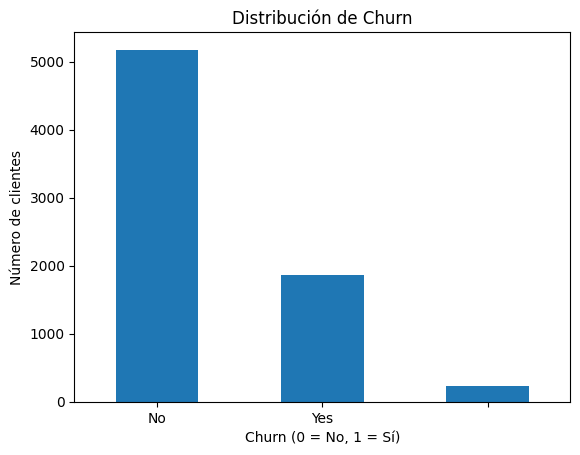

In [35]:
import matplotlib.pyplot as plt

# Conteo de churn
churn_counts = df['Churn'].value_counts()

# Gráfico de barras
plt.figure()
churn_counts.plot(kind='bar')
plt.title('Distribución de Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.show()


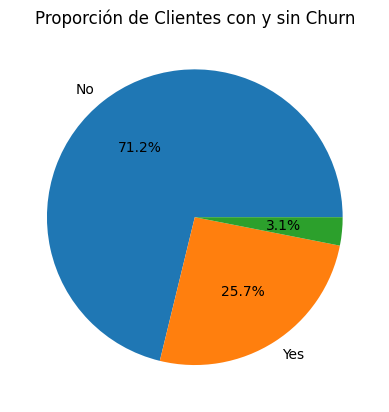

In [36]:
churn_percent = df['Churn'].value_counts(normalize=True) * 100

plt.figure()
churn_percent.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Clientes con y sin Churn')
plt.ylabel('')
plt.show()


Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [49]:
df['churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [50]:
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})


In [51]:
df['churn'].unique()
df['churn'].dtype


dtype('float64')

In [52]:
churn_gender = (
    df.groupby('customer_gender')['churn']
    .mean()
    .sort_values(ascending=False)
)

churn_gender


,churn
customer_gender,
Female,0.269209
Male,0.261603


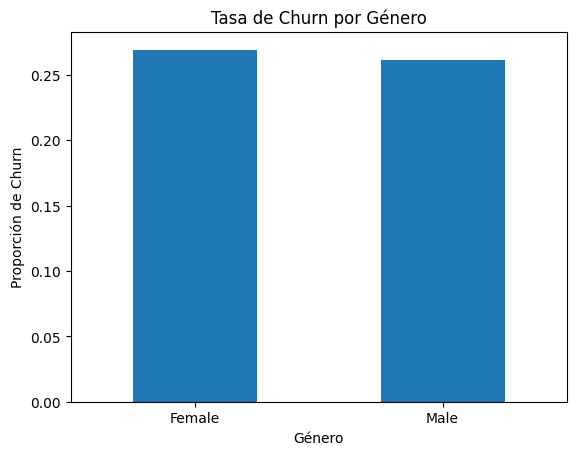

In [53]:
import matplotlib.pyplot as plt

plt.figure()
churn_gender.plot(kind='bar')
plt.title('Tasa de Churn por Género')
plt.xlabel('Género')
plt.ylabel('Proporción de Churn')
plt.xticks(rotation=0)
plt.show()


En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [59]:

df.groupby('churn')[[
    'antiguedad_meses',
    'cargo_total',
    'cargo_mensual',
    'Cuentas_Diarias'
]].describe()


antiguedad_meses                                                     \
                 count       mean        std  min   25%   50%   75%   max   
churn                                                                       
0.0             5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
1.0             1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      cargo_total               ... cargo_mensual         Cuentas_Diarias  \
            count         mean  ...           75%     max           count   
churn                           ...                                         
0.0        5163.0  2555.344141  ...          88.4  118.75          5174.0   
1.0        1869.0  1531.796094  ...          94.2  118.35          1869.0   

                                                                           
           mean       std       min       25%     50%       75%       max  
churn                                                                      
0.0    2.042171  1.036422  0.608333  0.836667  2.1475  2.946667  3.958333  
1.0    2.481378  0.822202  0.628333  1.871667  2.6550  3.140000  3.945000  

[2 rows x 32 columns]

<Figure size 640x480 with 0 Axes>

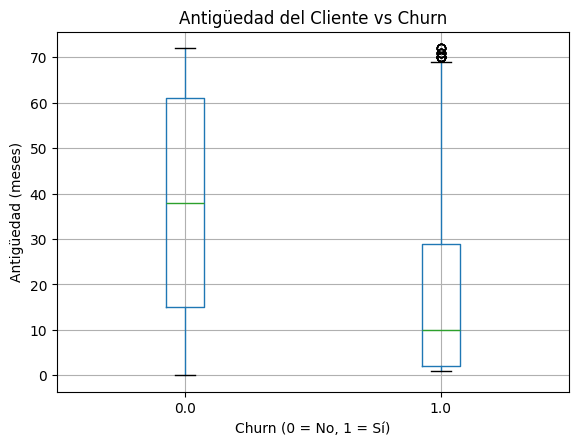

In [60]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='antiguedad_meses', by='churn')
plt.title('Antigüedad del Cliente vs Churn')
plt.suptitle('')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Antigüedad (meses)')
plt.show()


<Figure size 640x480 with 0 Axes>

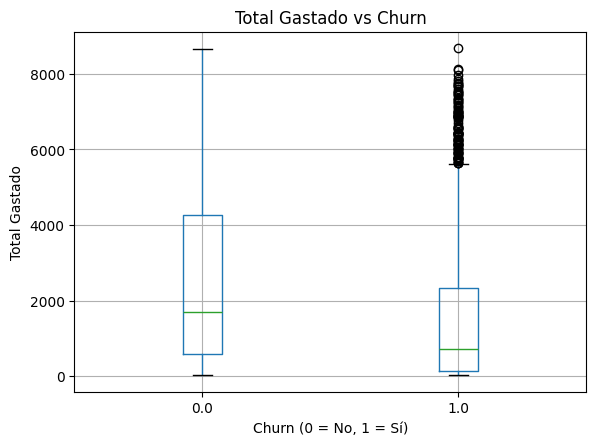

In [61]:
plt.figure()
df.boxplot(column='cargo_total', by='churn')
plt.title('Total Gastado vs Churn')
plt.suptitle('')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Total Gastado')
plt.show()


<Figure size 640x480 with 0 Axes>

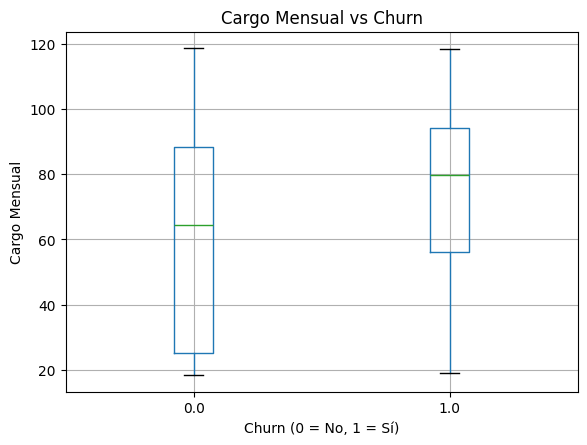

In [62]:
plt.figure()
df.boxplot(column='cargo_mensual', by='churn')
plt.title('Cargo Mensual vs Churn')
plt.suptitle('')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cargo Mensual')
plt.show()


<Figure size 640x480 with 0 Axes>

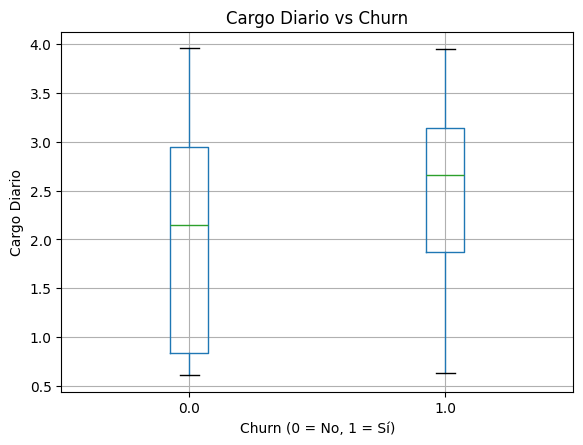

In [63]:
plt.figure()
df.boxplot(column='Cuentas_Diarias', by='churn')
plt.title('Cargo Diario vs Churn')
plt.suptitle('')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cargo Diario')
plt.show()


Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

# **Informe Final**

# **Introducción**

La evasión de clientes es uno de los principales desafíos para la empresa, ya que impacta directamente en los ingresos y en la sostenibilidad del negocio. Telecom X enfrenta una tasa significativa de cancelaciones, por lo que resulta fundamental comprender qué factores influyen en la decisión de un cliente de abandonar el servicio.

El objetivo de este análisis es explorar y comprender los datos de clientes, identificar patrones asociados al churn y generar insights accionables que permitan al equipo de Data Science y a las áreas de negocio diseñar estrategias efectivas de retención.

# **Limpieza y Tratamiento de Datos**

En esta etapa se prepararon los datos para garantizar su calidad, coherencia y utilidad analítica. Las principales acciones realizadas fueron:

Carga de datos desde una API.

Normalización del JSON, ya que el dataset contenía estructuras anidadas.

Estandarización de nombres de columnas, primero a español para análisis exploratorio y luego a inglés para consistencia y preparación para modelos.

Corrección de tipos de datos, especialmente columnas numéricas como total_charges.

Tratamiento de valores nulos, principalmente en clientes con baja antigüedad.

Unificación de categorías inconsistentes, como:

"No internet service" → "No"

Conversión de variables binarias (Yes/No) a valores numéricos (1/0).

Creación de una nueva variable:

daily_charges, calculada a partir de la facturación mensual para un análisis más granular.

Estas acciones aseguraron un dataset limpio, consistente y listo para el análisis exploratorio y modelado.

# **Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio permitió comprender tanto la distribución general de los clientes como las diferencias claves entre quienes cancelan y quienes no.

# Distribución del Churn

Se observó que el churn representa una proporción relevante del total de clientes, confirmando que no se trata de un fenómeno marginal.

El dataset presenta un ligero desbalance, típico en problemas de churn.

# Churn y Variables Categóricas

Los gráficos mostraron patrones claros:

# Tipo de contrato:

Los clientes con contratos mensuales presentan la mayor tasa.

Los contratos anuales y bianuales reducen significativamente la evasión.

# Método de pago:

El pago mediante electronic check está asociado a mayores tasas de clientes.

Los métodos automáticos presentan mayor retención.

# Servicios de internet:

Los clientes con fibra óptica muestran mayor propensión a cancelar.

# Género:

No se observaron diferencias significativas, lo que indica bajo poder predictivo.

# Churn y Variables Numéricas

El análisis descriptivo y los boxplots revelaron que los clientes que cancelan:

Tienen menor antigüedad.

Presentan menor gasto total acumulado.

Pagan cargos mensuales y diarios más altos, lo que sugiere sensibilidad al precio.

# Conclusiones e Insights

A partir del análisis, se identificaron los siguientes hallazgos clave:

El churn se concentra principalmente en clientes nuevos.

Los contratos de corta duración son el factor más fuertemente asociado a la evasión.

Cargos mensuales y diarios elevados incrementan la probabilidad de cancelación.

La ausencia de servicios de soporte y seguridad aumenta el riesgo de churn.

El método de pago refleja patrones de comportamiento y compromiso del cliente.

Estos insights proporcionan una base sólida para la construcción de modelos predictivos y para la toma de decisiones estratégicas.

# Recomendaciones

Con base en los resultados obtenidos, se sugieren las siguientes acciones estratégicas:

Incentivar contratos de largo plazo
Ofrecer descuentos o beneficios exclusivos para migrar clientes mensuales a contratos anuales o bianuales.

Optimizar la estrategia de precios
Revisar planes con cargos diarios y mensuales elevados, especialmente para clientes nuevos.

Promover métodos de pago automáticos
Ofrecer incentivos por cambiar de electronic check a pagos automáticos.

Fortalecer servicios de soporte y valor agregado
Incluir soporte técnico y seguridad como parte de paquetes estándar para reducir la evasión.

Estrategias tempranas de retención
Implementar acciones específicas durante los primeros meses del cliente, cuando el riesgo de churn es mayor.

